In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 90%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

%reload_ext jupyternotify

#%notify

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import sys
from qutip import *
import matplotlib.pyplot as plt
from pathlib import Path

parent_path = ".." #str(Path(__file__).resolve().parents[1])
sys.path.append(parent_path)

import pysqkit


import time
import os


%matplotlib notebook
plt.rcParams['figure.figsize'] = (10, 7)

In [3]:
from math import pi

h = 6.62607 * 10**(-34)
h_bar = h/(2*pi)
e = 1.6071766*10**(-19)
phi_0 = h/(2*e)



# Past Code

In [19]:
"""
Energy levels and eigenfuntions for the fluxonium qubit
"""


""" Parameters from Earnest et al "Realization of a Λ system with 
metastable states of a capacitively-shunted fluxonium" """

ec = 1    # unit fixed to 1
ej = 17.63 #value Earnest et al 17.63
el = 0.52 #value Earnest et al 0.52
phi_bias = -0*0.02*2*np.pi # value from Earnest et al -0.02*2*np.pi
n_fock = 100 #1000
n_points = 1000 #flux points for wave function plot
n_lev = 10
delta = 5 #range wave function plot
n_fock_wave = 150 # higher than 160 it crashes when calculating wave function

flx = fluxonium.Fluxonium(ec, ej, el, phi_bias, np.pi)

#%%

""" Fluxonium potential """

phi_vec = np.linspace(-delta*np.pi, delta*np.pi, n_points)
v_flx = flx.potential(phi_vec)


# %%

""" Plot fluxonium potential """

fig_pot, ax_pot = plt.subplots(figsize = (8, 6))
ax_pot.plot(phi_vec/np.pi, v_flx, color = 'darkviolet', linewidth = 2.0)
ax_pot.set_xlabel('$\phi/\pi$', fontsize = 20)
ax_pot.set_ylabel('$U/E_C$', fontsize = 20)
ax_pot.set_title('Potential', fontsize = 20)
plt.show()

# %%

""" Eigenenergies and eigenvectors (in Fock basis) """

eig_en, eig_vec = flx.eigenstates(n_fock)

# %%

""" Wave functions """

psi = np.zeros([n_lev, n_points], dtype = complex)
for k in range(0, n_lev):
    for m in range(0, n_points):
        psi[k, m] = fluxonium.wave_function(flx.m, flx.omega0, 1,\
            phi_vec[m]/(np.sqrt(2)*flx.r_phi), eig_vec[k][0: n_fock_wave])

# %%

""" Plot wave functions """

lev = 1
shift = eig_en[lev]
ampl = flx.ej
fig_wf, ax_wf = plt.subplots(figsize = (8,6))
# Sqrt(pi)?
ax_wf.plot(phi_vec, ampl*psi[lev, :] + shift, \
    color = 'darkorange', linewidth = 2.0)
ax_wf.plot(phi_vec, v_flx, color = 'darkviolet', linewidth = 2.0)
ax_wf.set_xlabel('$\phi_-/\sqrt{\pi}$', fontsize = 20) #sqrt(pi) label?
ax_wf.set_ylabel('$\Psi$', fontsize = 20)
ax_wf.set_title('Wave function ' + str(lev) , fontsize = 20)
plt.grid(linestyle = '--')
plt.show()


ValueError: The qubit label must be a string type variable

# Current code

## Single qubit stuff

In [56]:
e_c_ref = 1

e_c = 1.
e_l = 2
e_j = 15

flux =  1/2 #(-> pi dans le cos) #en fait dans les calculs c'est putôt la phase




In [57]:
flx = pysqkit.qubits.Fluxonium(label = "QB1",
                               charge_energy=e_c,
                               induct_energy=e_l,
                               joseph_energy=e_j,
                               flux=flux,
                               basis=None,
                               dim_hilbert=100)
#Last two are set at default

In [58]:
print("Properties of the simulated fluxonium qubit : \n")

print("E_c = ", flx.charge_energy*e_c_ref, "MHz")
print("E_l = ", flx.induct_energy*e_c_ref, "MHz")
print("E_j = ", flx.joseph_energy*e_c_ref, "MHz")
print("Phi = ", flx.flux)

print("\nomega_res = ", flx.res_freq, "MHz")
print("equivalent mass is m = ", flx.osc_mass)
print("osc_len = ", flx.osc_len)

print("\nPhi_ZPF = ", flx.flux_zpf)
print("Q_ZPF = ", flx.charge_zpf)

print("\nH = ", flx.hamiltonian(), "\ndimensions are ", flx.hamiltonian().shape)

print("\nPotential at flux=0 is V = ", flx.potential(0))

#print("\n WIth no flux |phi> = ",  flx.wave_function(0))

Properties of the simulated fluxonium qubit : 

E_c =  1.0 MHz
E_l =  2 MHz
E_j =  15 MHz
Phi =  0.5

omega_res =  4.0 MHz
equivalent mass is m =  0.125
osc_len =  1.4142135623730951

Phi_ZPF =  1.0
Q_ZPF =  0.5

H =  [[ 1.10979599e+01  1.11417875e-15 -6.43322914e+00 ...  1.13601538e-91
  -9.36952928e-77 -1.16475152e-93]
 [ 1.11417875e-15  6.00000000e+00  7.87843347e-16 ...  8.90521850e-74
   1.11300872e-90 -9.32256393e-76]
 [-6.43322914e+00  7.87843347e-16  5.45102005e+00 ... -7.32514823e-88
   6.16872542e-73  7.83153404e-90]
 ...
 [ 1.13601538e-91  8.90521850e-74 -7.32514823e-88 ...  3.91474753e+02
  -2.07620171e-16  3.69521226e-01]
 [-9.36952928e-77  1.11300872e-90  6.16872542e-73 ... -2.07620171e-16
   3.94441830e+02 -7.59149619e-17]
 [-1.16475152e-93 -9.32256393e-76  7.83153404e-90 ...  3.69521226e-01
  -7.59149619e-17  3.98074180e+02]] 
dimensions are  (100, 100)

Potential at flux=0 is V =  15.0


In [60]:
flx.wave_function(0, levels=10)

TypeError: eigh() got an unexpected keyword argument 'subset_by_index'

Le H est le suivant : 
$$ H = 4 E_C \hat{q}^2 + \dfrac{E_L}{2}\hat{\varphi}^2 - E_J cos(\hat{\varphi} + \varphi_e)$$
$$V = \dfrac{E_L}{2}\hat{\varphi}^2 - E_J cos(\hat{\varphi} + \varphi_e)$$

A $\varphi_e = \pi$ on a $V = \dfrac{E_L}{2}\hat{\varphi}^2 + E_J cos(\hat{\varphi})$

### Var of V with external flux

<IPython.core.display.Javascript object>


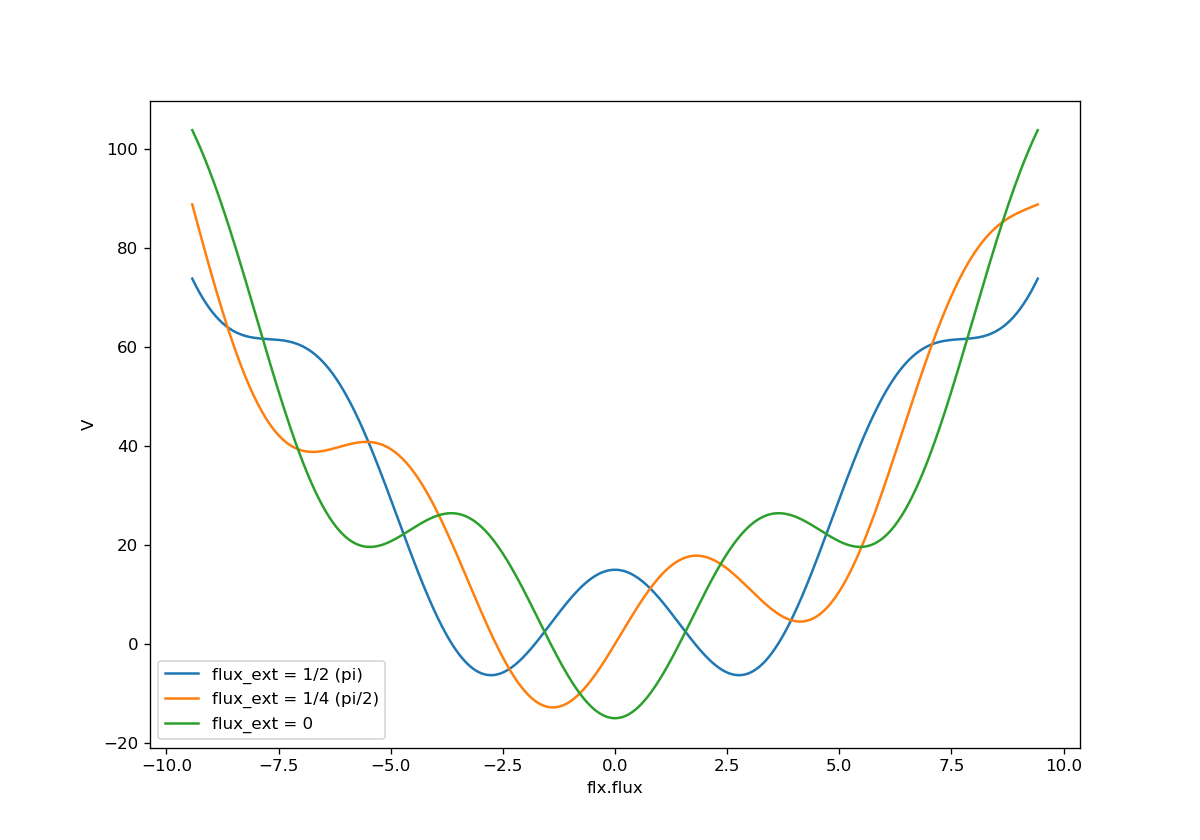

In [44]:
#Var of external flux

flx = pysqkit.qubits.Fluxonium(label = "QB1",
                               charge_energy=e_c,
                               induct_energy=e_l,
                               joseph_energy=e_j,
                               flux=flux,
                               basis=None,
                               dim_hilbert=100)
range_flux = np.linspace(-3*pi, 3*pi, 1000)
range_V = flx.potential(range_flux)

plt.figure()
plt.plot(range_flux, range_V, label = "flux_ext = 1/2 (pi)")
plt.xlabel("flx.flux")
plt.ylabel("V")


#add more curves
flx = pysqkit.qubits.Fluxonium(label = "QB1",
                               charge_energy=e_c,
                               induct_energy=e_l,
                               joseph_energy=e_j,
                               flux=1/4,
                               basis=None,
                               dim_hilbert=100)

range_flux = np.linspace(-3*pi, 3*pi, 1000)
range_V = flx.potential(range_flux)
plt.plot(range_flux, range_V, label = "flux_ext = 1/4 (pi/2)")


flx = pysqkit.qubits.Fluxonium(label = "QB1",
                               charge_energy=e_c,
                               induct_energy=e_l,
                               joseph_energy=e_j,
                               flux=0,
                               basis=None,
                               dim_hilbert=100)

range_flux = np.linspace(-3*pi, 3*pi, 1000)
range_V = flx.potential(range_flux)
plt.plot(range_flux, range_V, label = "flux_ext = 0")


plt.legend()

### Var of V with E_L

<IPython.core.display.Javascript object>


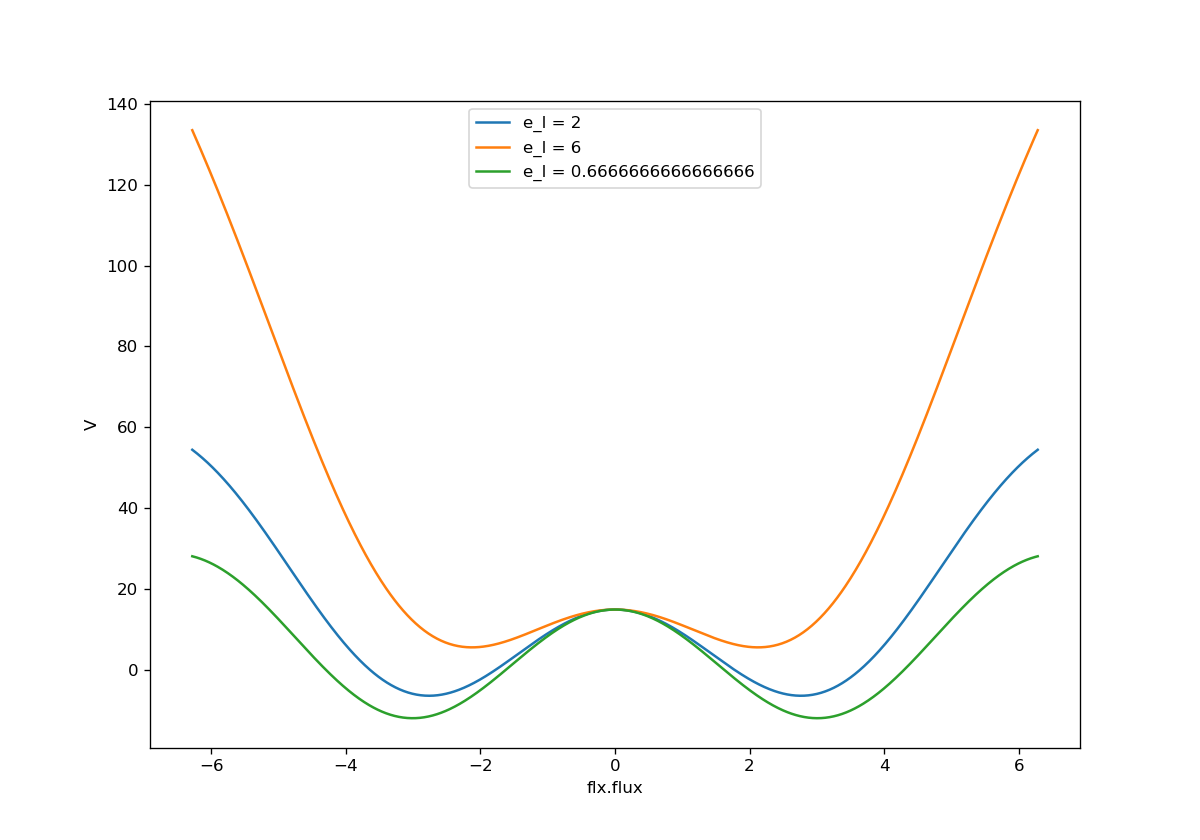

In [53]:
plt.figure()
plt.xlabel("flx.flux")
plt.ylabel("V")


var_factor = 3

flx = pysqkit.qubits.Fluxonium(label = "QB1",
                               charge_energy=e_c,
                               induct_energy=e_l,
                               joseph_energy=e_j,
                               flux=flux,
                               basis=None,
                               dim_hilbert=100)

range_flux = np.linspace(-2*pi, 2*pi, 1000)
range_V = flx.potential(range_flux)
plt.plot(range_flux, range_V, label = "e_l = "+str(e_l))


flx = pysqkit.qubits.Fluxonium(label = "QB1",
                               charge_energy=e_c,
                               induct_energy=e_l*var_factor,
                               joseph_energy=e_j,
                               flux=flux,
                               basis=None,
                               dim_hilbert=100)

range_V = flx.potential(range_flux)
plt.plot(range_flux, range_V, label = "e_l = "+str(e_l*var_factor))


flx = pysqkit.qubits.Fluxonium(label = "QB1",
                               charge_energy=e_c,
                               induct_energy=e_l/var_factor,
                               joseph_energy=e_j,
                               flux=flux,
                               basis=None,
                               dim_hilbert=100)

range_V = flx.potential(range_flux)
plt.plot(range_flux, range_V, label = "e_l = "+str(e_l/var_factor))

plt.legend()

### Var of V with E_j

<IPython.core.display.Javascript object>


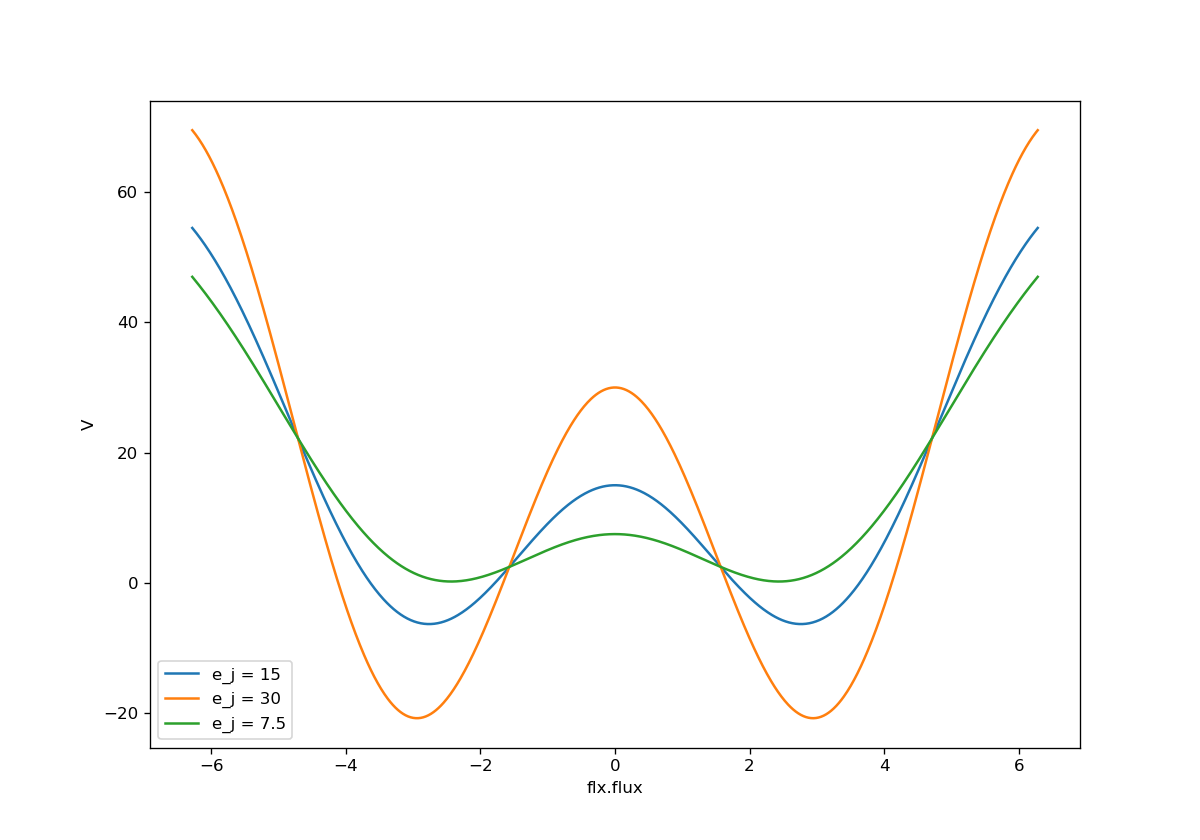

In [55]:
plt.figure()
plt.xlabel("flx.flux")
plt.ylabel("V")


var_factor = 2

flx = pysqkit.qubits.Fluxonium(label = "QB1",
                               charge_energy=e_c,
                               induct_energy=e_l,
                               joseph_energy=e_j,
                               flux=flux,
                               basis=None,
                               dim_hilbert=100)

range_flux = np.linspace(-2*pi, 2*pi, 1000)
range_V = flx.potential(range_flux)
plt.plot(range_flux, range_V, label = "e_j = "+str(e_j))


flx = pysqkit.qubits.Fluxonium(label = "QB1",
                               charge_energy=e_c,
                               induct_energy=e_l,
                               joseph_energy=e_j*var_factor,
                               flux=flux,
                               basis=None,
                               dim_hilbert=100)

range_V = flx.potential(range_flux)
plt.plot(range_flux, range_V, label = "e_j = "+str(e_j*var_factor))


flx = pysqkit.qubits.Fluxonium(label = "QB1",
                               charge_energy=e_c,
                               induct_energy=e_l,
                               joseph_energy=e_j/var_factor,
                               flux=flux,
                               basis=None,
                               dim_hilbert=100)

range_V = flx.potential(range_flux)
plt.plot(range_flux, range_V, label = "e_j = "+str(e_j/var_factor))

plt.legend()

# test